### This project focuses on analyzing the root causes and factors leading to customer attrition in a telecommunications company. It involves building a predictive model to identify customers at risk of churning, enabling proactive measures to prevent it.

## Data Processing


In [ ]:
!pip install dalex
!pip install scikit-plot
!pip install shap
!pip install eli5
!pip install lime

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import numpy as np
from sklearn.model_selection import GridSearchCV
# load scikit-plot modules
import scikitplot as skplt

from sklearn.metrics import (r2_score,mean_absolute_error,mean_squared_error)
from sklearn.model_selection import train_test_split

# import dalex to explain complex model
import dalex as dx

# load scikit-plot modules
import scikitplot as skplt

# load shap package for shap explanation
import shap

# load eli5
import eli5

# load LimeTabularExplainer for LIME method
from lime.lime_tabular import LimeTabularExplainer

In [ ]:
url = 'https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/bank_churn_dataset/bank_churn_data.csv'
df = pd.read_csv(url)

In [ ]:
df.head()

,user_id,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
duplicate_count = df['user_id'].duplicated().sum()
duplicate_count

0

In [ ]:
df.drop('user_id', axis=1, inplace=True)

In [ ]:
df.dtypes

attrition_flag               object
customer_age                  int64
gender                       object
dependent_count               int64
education_level              object
marital_status               object
income_category              object
card_category                object
months_on_book                int64
total_relationship_count      int64
months_inactive_12_mon        int64
contacts_count_12_mon         int64
credit_limit                float64
total_revolving_bal           int64
avg_open_to_buy             float64
total_amt_chng_q4_q1        float64
total_trans_amt               int64
total_trans_ct                int64
total_ct_chng_q4_q1         float64
avg_utilization_ratio       float64
dtype: object

In [ ]:
# Summary statistics for numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_age,10127.0,46.325960,8.016814,26.0,41.000,46.000,52.000,73.000
dependent_count,10127.0,2.346203,1.298908,0.0,1.000,2.000,3.000,5.000
months_on_book,10127.0,35.928409,7.986416,13.0,31.000,36.000,40.000,56.000
total_relationship_count,10127.0,3.812580,1.554408,1.0,3.000,4.000,5.000,6.000
months_inactive_12_mon,10127.0,2.341167,1.010622,0.0,2.000,2.000,3.000,6.000
contacts_count_12_mon,10127.0,2.455317,1.106225,0.0,2.000,2.000,3.000,6.000
credit_limit,10127.0,8631.953698,9088.776650,1438.3,2555.000,4549.000,11067.500,34516.000
total_revolving_bal,10127.0,1162.814061,814.987335,0.0,359.000,1276.000,1784.000,2517.000
avg_open_to_buy,10127.0,7469.139637,9090.685324,3.0,1324.500,3474.000,9859.000,34516.000
total_amt_chng_q4_q1,10127.0,0.759941,0.219207,0.0,0.631,0.736,0.859,3.397


In [ ]:
# Summary statistics for categorical columns
df.describe(include='object')

,attrition_flag,gender,education_level,marital_status,income_category,card_category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


In [ ]:
# Calculate missing values
total_missing = df.isnull().sum().sum()
total_entries = df.shape[0] * df.shape[1]
missing_data = df.isnull().sum()
missing_percentage = (missing_data[missing_data > 0] / df.shape[0]) * 100

total_missing_percentage = (total_missing / total_entries) * 100

# Display total missing percentage in the dataset
print(f"\nTotal percentage of missing values in the dataset: {total_missing_percentage:.2f}%")


Total percentage of missing values in the dataset: 0.00%


In [ ]:

# Check for duplicate rows
print("\nNumber of duplicate rows:")
print(df.duplicated().sum())



Number of duplicate rows:
0


## 1. Distribution of customer age and top 10 age with the highest churn rate

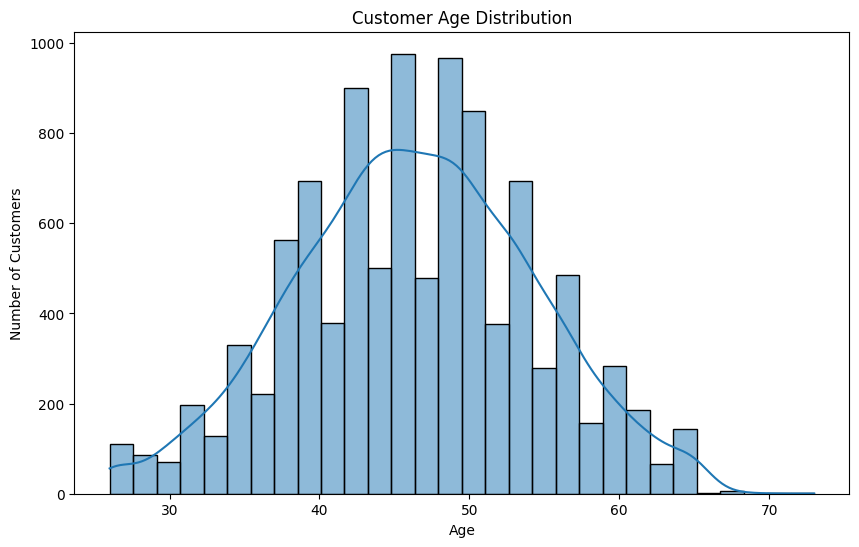

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['customer_age'], bins=30, kde=True)
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()

The distribution of customer ages shows that most users are centered around 40-50 years old, which is the millennial generation.

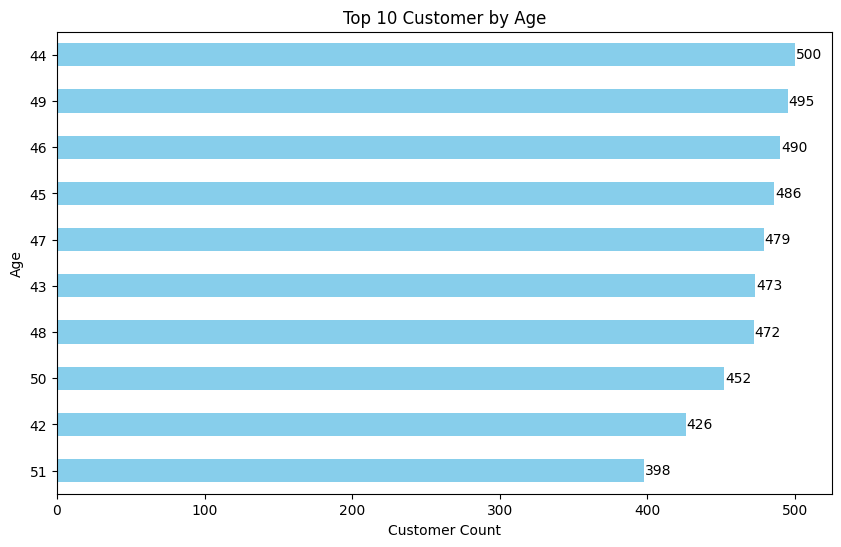

In [ ]:
age_counts = df['customer_age'].value_counts().sort_index()
age_counts_10 = age_counts.sort_values(ascending=False).head(10)


plt.figure(figsize=(10, 6))
bars = age_counts_10.plot(kind='barh', color='skyblue')


for index, value in enumerate(age_counts_10):
    plt.text(value + 0.5, index, str(value), va='center')

plt.title('Top 10 Customer by Age')
plt.xlabel('Customer Count')
plt.ylabel('Age')
plt.gca().invert_yaxis()
plt.show()

if we more specific with the analysis to observe the top 10 age with the most user we can find it around age of 40 - 51 with the age of 44 with the most user.

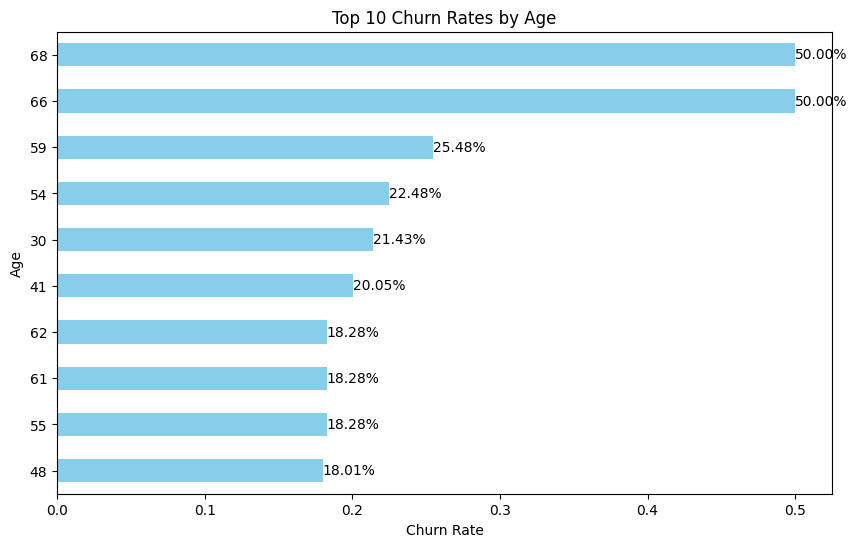

In [ ]:

churn_by_age = df[df['attrition_flag'] == 'Attrited Customer']['customer_age'].value_counts().sort_index()
total_by_age = df['customer_age'].value_counts().sort_index()
churn_rate_by_age = (churn_by_age / total_by_age).fillna(0)


top_10_churn_rates = churn_rate_by_age.sort_values(ascending=False).head(10)


plt.figure(figsize=(10, 6))
bars = top_10_churn_rates.plot(kind='barh', color='skyblue')


for index, value in enumerate(top_10_churn_rates):
    plt.text(value, index, f'{value:.2%}', va='center')

plt.title('Top 10 Churn Rates by Age')
plt.xlabel('Churn Rate')
plt.ylabel('Age')
plt.gca().invert_yaxis()
plt.show()

The analysis of the "churn rate" shows the percentage ratio of attrited customers within the total customers of each age group. By observing the age group with the highest churn possibility, we look at the percentage of attrited customers. If we only consider the count of total attrited customers, the result will show ages 40-50 as having the highest churn due to this group having the most customers. However, this would not accurately reflect the churn trend based on age.

The plot shows that ages 66 and 68 have the highest percentage of attrited customers within their age group, indicating that these ages have the highest possibility of churn. Additionally, the trend shows that the older the age, the higher the percentage of attrited customers. This suggests that older users might have less need for online financing platforms, or that the platform's features/UI are too complicated for older users to use.

## 2. Education level and income category influence towards churn

In [ ]:

def calculate_mode(group):
    return group.mode().iloc[0]

mode_income_category = df.groupby('education_level')['income_category'].apply(calculate_mode).reset_index()

mode_income_category

,education_level,income_category
0,College,Less than $40K
1,Doctorate,Less than $40K
2,Graduate,Less than $40K
3,High School,Less than $40K
4,Post-Graduate,Less than $40K
5,Uneducated,Less than $40K
6,Unknown,Less than $40K



Based on a simple mode analysis to observe the most common income category within each education level, the income category "Less than $40K" is the most prevalent across all education levels. We can conclude that education does not have a significant impact on the income category of the users.

<Figure size 1000x600 with 0 Axes>

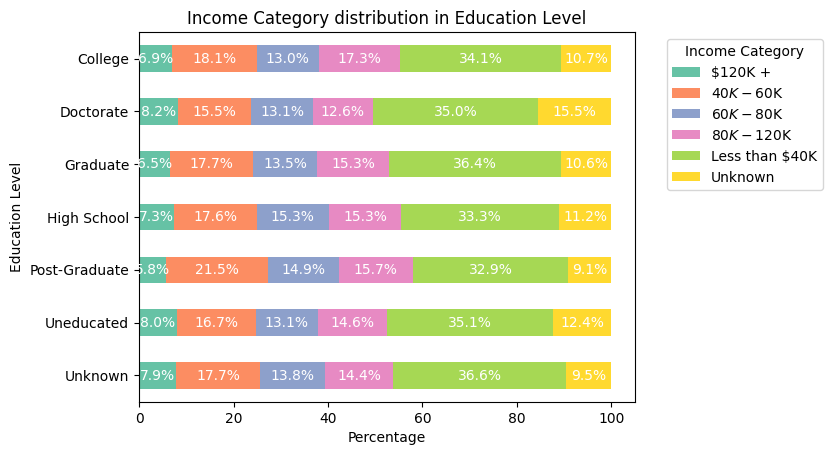

In [ ]:
# Group by 'education_level' and 'income_category', then count occurrences
df_edu = df.groupby(['education_level', 'income_category']).size().reset_index(name='Count')

# Calculate total counts per education_level
df_edu['Total'] = df_edu.groupby('education_level')['Count'].transform('sum')

# Calculate percentage for each income_category within each education_level
df_edu['Percentage'] = df_edu['Count'] / df_edu['Total'] * 100

# Pivot the DataFrame for plotting
df_pivot = df_edu.pivot(index='education_level', columns='income_category', values='Percentage').fillna(0)

# Plotting horizontal stacked bar chart with data labels
plt.figure(figsize=(10, 6))
ax = df_pivot.plot(kind='barh', stacked=True, color=sns.color_palette('Set2'))

# Add data labels
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.text(left + width / 2, bottom + height / 2, f'{width:.1f}%', ha='center', va='center', fontsize=10, color='white')

plt.title('Income Category distribution in Education Level')
plt.xlabel('Percentage')
plt.ylabel('Education Level')
plt.legend(title='Income Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.gca().invert_yaxis()  # Invert y-axis to have highest education_level at the top
plt.show()

- A more detailed distribution analysis of the income category for each education level shows that there is no significant impact of education level on the income category of the users. The income category "Less than $40K" has the highest percentage across all education level groups.

- Logically, higher education should correlate with higher income. However, the distribution analysis shows the opposite: while the highest income category "$120K+" has the highest percentage within the doctorate education level, the second highest percentage is within the uneducated group.

- We can conclude that most users of the financing platform fall into the income category "Less than $40K," regardless of their educational background. This may indicate that one of the main motivations for using these platforms is financial necessity among lower-income individuals.








<ipython-input-20-3589f05417d6>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=edu_attrited_percentages.values, y=edu_attrited_percentages.index, palette='Blues_d', orient='h')


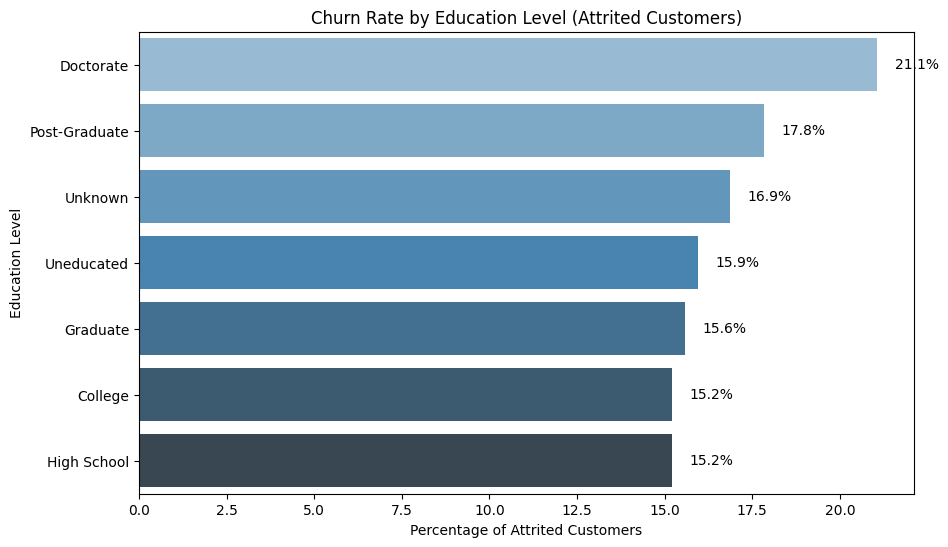

<ipython-input-20-3589f05417d6>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=inc_attrited_percentages.values, y=inc_attrited_percentages.index, palette='Blues_d', orient='h')


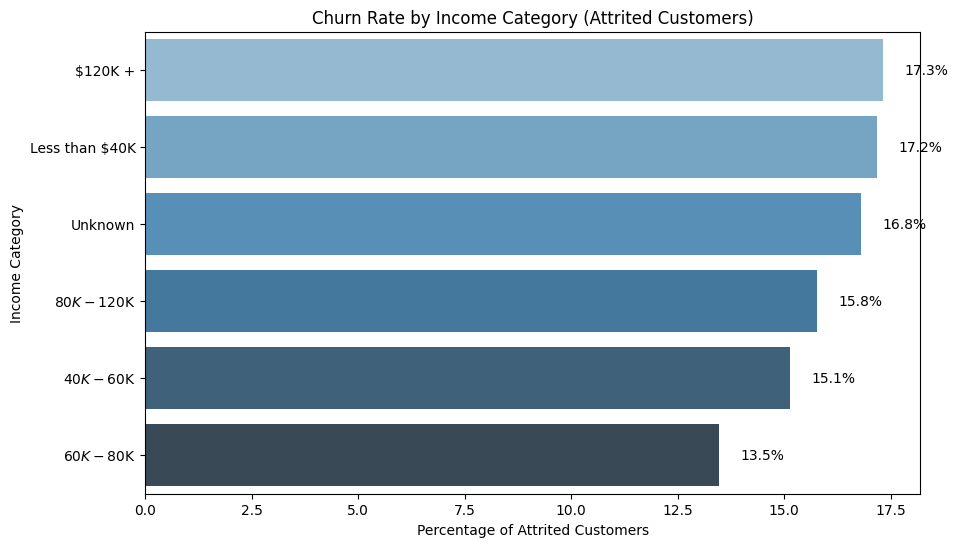

In [ ]:
df_attrited = df[df['attrition_flag'] == 'Attrited Customer']

edu_total_counts = df['education_level'].value_counts()
inc_total_counts = df['income_category'].value_counts()

edu_attrited_counts = df_attrited['education_level'].value_counts().sort_values(ascending=False)
edu_attrited_percentages = (edu_attrited_counts / edu_total_counts * 100).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=edu_attrited_percentages.values, y=edu_attrited_percentages.index, palette='Blues_d', orient='h')

for i, v in enumerate(edu_attrited_percentages):
    ax.text(v + 0.5, i, f'{v:.1f}%', va='center', fontsize=10)

plt.title('Churn Rate by Education Level (Attrited Customers)')
plt.xlabel('Percentage of Attrited Customers')
plt.ylabel('Education Level')
plt.show()

inc_attrited_counts = df_attrited['income_category'].value_counts().sort_values(ascending=False)
inc_attrited_percentages = (inc_attrited_counts / inc_total_counts * 100).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=inc_attrited_percentages.values, y=inc_attrited_percentages.index, palette='Blues_d', orient='h')

for i, v in enumerate(inc_attrited_percentages):
    ax.text(v + 0.5, i, f'{v:.1f}%', va='center', fontsize=10)

plt.title('Churn Rate by Income Category (Attrited Customers)')
plt.xlabel('Percentage of Attrited Customers')
plt.ylabel('Income Category')
plt.show()

Lastly, we break down the analysis to observe the relationship between income category and education level with the percentage of attrited customers within each group.

The analysis shows that the `Doctorate` education level and the `$120K+` income category have the highest percentage of attrited customers within their groups. This indicates that users with a `Doctorate` education level or users with an income of `$120K+` have a higher possibility of churning.

However, the overall graphic shows no significant relationship between higher income and the likelihood of a user stopping the use of the platform. This is evident because the `Less than $40K` income category also has a high percentage of churned customers. While the higher education levels (`Doctorate` and `Post-graduate`) have a higher percentage of churned customers, indicating that users with high education levels (beyond the graduate level) have a higher possibility of churning.

## 3. Gender category influence towards churn

<ipython-input-21-476d7daf6945>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=gender_attrited_percentages.values, y=gender_attrited_percentages.index, palette='Blues_d', orient='h')


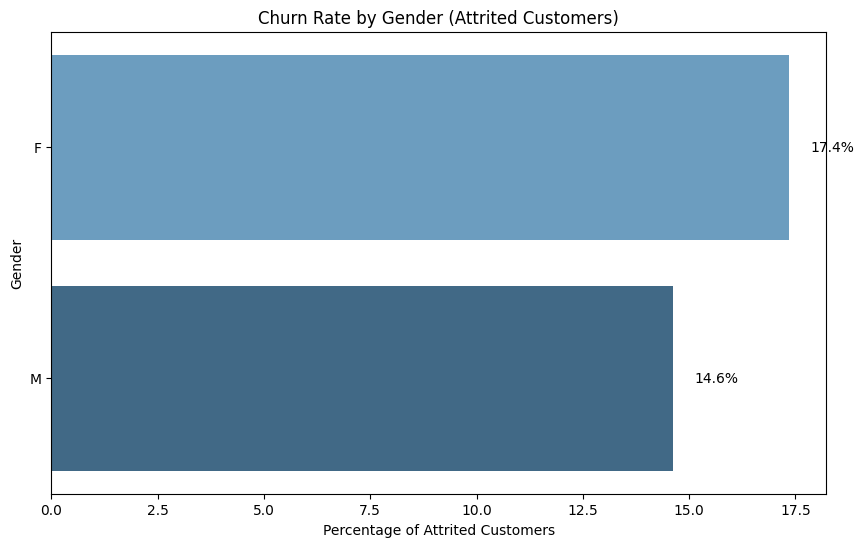

In [ ]:
gender_total_counts = df['gender'].value_counts()

gender_attrited_counts = df[df['attrition_flag'] == 'Attrited Customer']['gender'].value_counts()
gender_attrited_percentages = (gender_attrited_counts / gender_total_counts * 100).sort_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=gender_attrited_percentages.values, y=gender_attrited_percentages.index, palette='Blues_d', orient='h')

for i, v in enumerate(gender_attrited_percentages):
    ax.text(v + 0.5, i, f'{v:.1f}%', va='center', fontsize=10)

plt.title('Churn Rate by Gender (Attrited Customers)')
plt.xlabel('Percentage of Attrited Customers')
plt.ylabel('Gender')
plt.show()

The graph shows that the female gender has a higher percentage of churned users, although this difference is not statistically significant compared to the male group.

In [ ]:
gender_contingency = pd.crosstab(df['gender'], df['attrition_flag'])
chi2, p, _, _ = chi2_contingency(gender_contingency)
print(f"Chi-square test for independence between gender and churn: chi2={chi2}, p-value={p}")

Chi-square test for independence between gender and churn: chi2=13.86561370063734, p-value=0.00019635846717310307


To further refine our analysis, we will use the Chi-square test to statistically analyze if there is any significant difference between males and females in terms of churn likelihood.

the results show:
1. Significance Level: The p-value is much lower than the common significance level of 0.05.

2. Rejecting the Null Hypothesis: This low p-value indicates that we can reject the null hypothesis, which states that there is no relationship between gender and churn likelihood.

3. Conclusion: There is a statistically significant relationship between gender and churn likelihood. This suggests that the likelihood of customer churn is different between genders.







## 4. Correlation between length of being a customer and churn likelihood

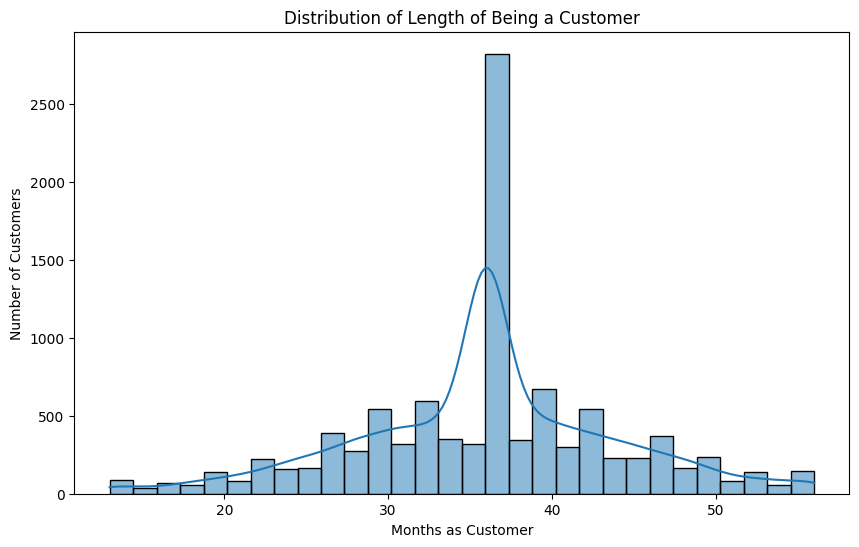

In [ ]:

plt.figure(figsize=(10, 6))
sns.histplot(df['months_on_book'], bins=30, kde=True)
plt.title('Distribution of Length of Being a Customer')
plt.xlabel('Months as Customer')
plt.ylabel('Number of Customers')
plt.show()


To understand the relationship between the length of time as a customer (months_on_book) and the possibility of churn, we will analyze the distribution based on months_on_book, which represents the period of being a customer in months.

First, based on the distribution of users by months_on_book, it shows that most users stay as customers for around 35 to 40 months.

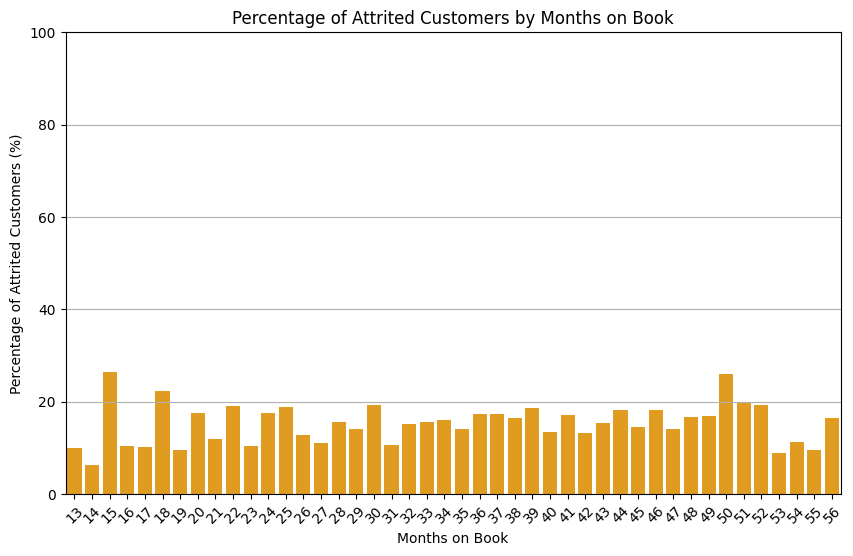

In [ ]:
total_counts = df['months_on_book'].value_counts().sort_index()

df_attrited = df[df['attrition_flag'] == 'Attrited Customer']

attrited_counts = df_attrited['months_on_book'].value_counts().sort_index()

attrition_rate = (attrited_counts / total_counts) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x=attrition_rate.index, y=attrition_rate.values, color='orange')
plt.title('Percentage of Attrited Customers by Months on Book')
plt.xlabel('Months on Book')
plt.ylabel('Percentage of Attrited Customers (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.ylim(0, 100)
plt.show()

Next, we will analyze the percentage of churned customers within each month that the user has been a customer to observe any relationship.

We can see that most customers possibly churn in the beginning months of using the platform. Additionally, after using the platform for a long time, there are peaks at around 15 months and 50 months where there is a higher percentage of churned customers.

It can be concluded that users may use the platform for either short-term financing or long-term financing, based on these patterns.

## 5. Impact of interactions with the bank in the last year on churn likelihood

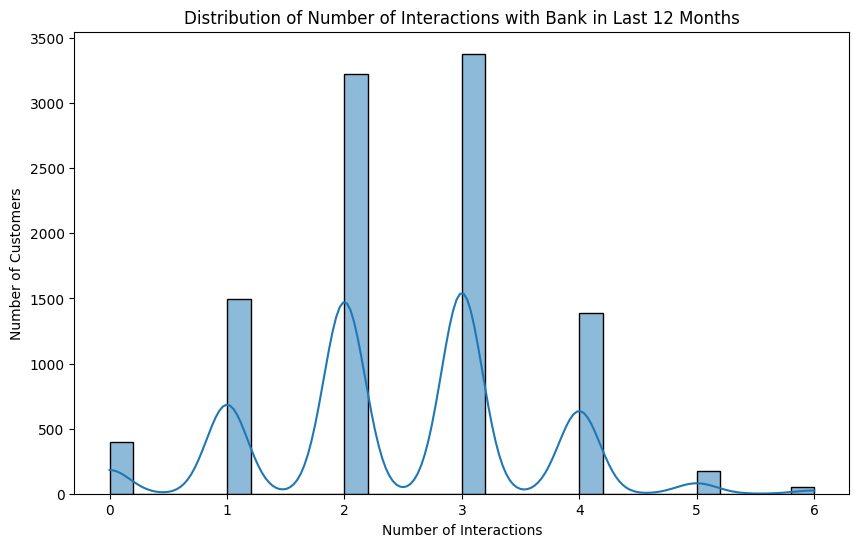

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['contacts_count_12_mon'], bins=30, kde=True)
plt.title('Distribution of Number of Interactions with Bank in Last 12 Months')
plt.xlabel('Number of Interactions')
plt.ylabel('Number of Customers')
plt.show()

To understand the impact of interactions with the bank in the last year on churn likelihood, we will analyze contacts_count_12_mon, which represents the number of interactions between the bank and the customer in the last 12 months.

The graph shows that most customers interacted three times within the last 12 months.


In [ ]:

df_attrited = df[df['attrition_flag'] == 'Attrited Customer']
df_existing = df[df['attrition_flag'] == 'Existing Customer']

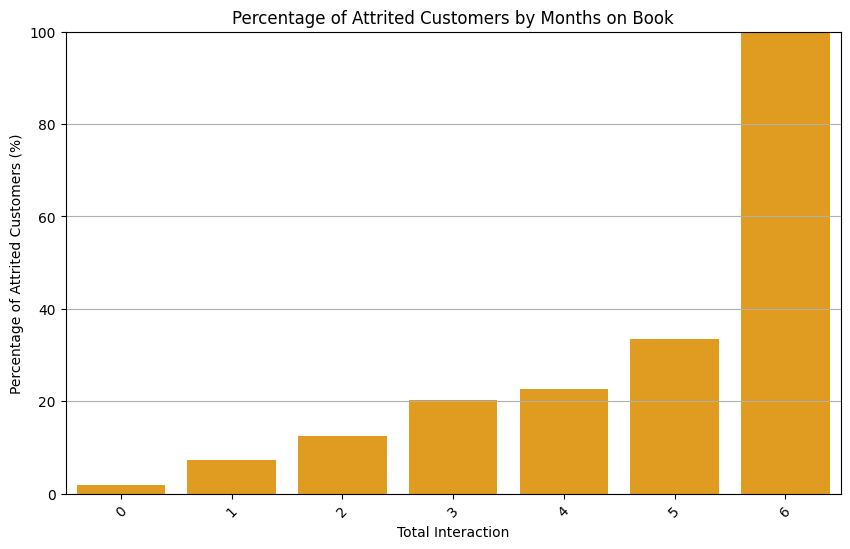

In [ ]:
total_counts = df['contacts_count_12_mon'].value_counts().sort_index()

df_attrited = df[df['attrition_flag'] == 'Attrited Customer']

attrited_counts = df_attrited['contacts_count_12_mon'].value_counts().sort_index()

attrition_rate = (attrited_counts / total_counts) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x=attrition_rate.index, y=attrition_rate.values, color='orange')
plt.title('Percentage of Attrited Customers by Months on Book')
plt.xlabel('Total Interaction')
plt.ylabel('Percentage of Attrited Customers (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.ylim(0, 100)
plt.show()


The graph shows that customers who had 6 interactions with the bank are all churned customers (100% churn rate). Overall, the trend in the graph indicates that higher interaction frequency in the last 12 months correlates with a higher percentage of churned customers.

In [ ]:
 #Encode 'gender' and 'marital_status' directly
df['gender'] = df['gender'].replace({'F': 1, 'M': 0})
df = pd.get_dummies(df, columns=['marital_status'], prefix='marital_status', drop_first=True)
df['attrition_flag'] = df['attrition_flag'].replace({'Existing Customer': 1, 'Attrited Customer': 0})

# Convert boolean (True/False) columns to numerical (0/1)
boolean_columns = df.select_dtypes(include=bool).columns
df[boolean_columns] = df[boolean_columns].astype(int)

# Define ordinal mappings
education_mapping = {
    'Unknown': 0,
    'Uneducated': 1,
    'High School': 2,
    'College': 3,
    'Graduate': 4,
    'Post-Graduate': 5,
    'Doctorate': 6
}

income_mapping = {
    'Unknown': 0,
    'Less than $40K': 1,
    '$40K - $60K': 2,
    '$60K - $80K': 3,
    '$80K - $120K': 4,
    '$120K +': 5
}

card_mapping = {
    'Blue': 0,
    'Silver': 1,
    'Gold': 2,
}

# Apply ordinal encoding
df['education_level'] = df['education_level'].map(education_mapping)
df['income_category'] = df['income_category'].map(income_mapping)
df['card_category'] = df['card_category'].map(card_mapping)

In [ ]:
df = df.dropna()

# Check if NaN values are removed
print(df.isna().sum().sum())

0


In [ ]:
df

,attrition_flag,customer_age,gender,dependent_count,education_level,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,...,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,marital_status_Married,marital_status_Single,marital_status_Unknown
0,1,45,0,3,2,3,0.0,39,5,1,...,777,11914.0,1.335,1144,42,1.625,0.061,1,0,0
1,1,49,1,5,4,1,0.0,44,6,1,...,864,7392.0,1.541,1291,33,3.714,0.105,0,1,0
2,1,51,0,3,4,4,0.0,36,4,1,...,0,3418.0,2.594,1887,20,2.333,0.000,1,0,0
3,1,40,1,4,2,1,0.0,34,3,4,...,2517,796.0,1.405,1171,20,2.333,0.760,0,0,1
4,1,40,0,3,1,3,0.0,21,5,1,...,0,4716.0,2.175,816,28,2.500,0.000,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,1,50,0,2,4,2,0.0,40,3,2,...,1851,2152.0,0.703,15476,117,0.857,0.462,0,1,0
10123,0,41,0,2,0,2,0.0,25,4,2,...,2186,2091.0,0.804,8764,69,0.683,0.511,0,0,0
10124,0,44,1,1,2,1,0.0,36,5,3,...,0,5409.0,0.819,10291,60,0.818,0.000,1,0,0
10125,0,30,0,2,4,2,0.0,36,4,3,...,0,5281.0,0.535,8395,62,0.722,0.000,0,0,1


In [ ]:
# cretate predictor variables as X
X = df.drop(['attrition_flag'], axis = 1)
# create target data as y
y = df['attrition_flag']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    stratify = y,
    random_state=1000
)

In [ ]:
numerical_features = X_train.select_dtypes(include = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']).columns

In [ ]:
numerical_features

Index(['customer_age', 'gender', 'dependent_count', 'education_level',
       'income_category', 'card_category', 'months_on_book',
       'total_relationship_count', 'months_inactive_12_mon',
       'contacts_count_12_mon', 'credit_limit', 'total_revolving_bal',
       'avg_open_to_buy', 'total_amt_chng_q4_q1', 'total_trans_amt',
       'total_trans_ct', 'total_ct_chng_q4_q1', 'avg_utilization_ratio',
       'marital_status_Married', 'marital_status_Single',
       'marital_status_Unknown'],
      dtype='object')

In [ ]:
numerical_corr = X_train[numerical_features].corr()
numerical_corr.style.background_gradient(cmap='coolwarm')

,customer_age,gender,dependent_count,education_level,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,marital_status_Married,marital_status_Single,marital_status_Unknown
customer_age,1.000000,0.011695,-0.120386,0.001398,0.030083,-0.025080,0.790327,-0.005388,0.059277,-0.014070,0.003934,0.029988,0.001224,-0.060880,-0.050382,-0.071171,-0.015020,0.020485,0.050419,-0.019130,-0.011065
gender,0.011695,1.000000,-0.009158,0.005907,-0.787673,-0.082285,0.010465,-0.006643,0.006184,-0.045286,-0.411670,-0.030222,-0.409163,-0.027860,-0.022287,0.070916,0.005374,0.244979,-0.024094,0.019528,-0.009362
dependent_count,-0.120386,-0.009158,1.000000,-0.012178,0.066142,0.032761,-0.092444,-0.034056,-0.014426,-0.045525,0.070282,-0.006949,0.070950,-0.029140,0.022971,0.048791,0.017899,-0.036669,0.015610,-0.037493,0.036979
education_level,0.001398,0.005907,-0.012178,1.000000,-0.017866,0.012424,0.010244,-0.014043,0.002734,-0.015030,-0.010907,-0.015684,-0.009494,-0.012708,-0.008625,-0.001363,-0.014967,-0.006363,0.018546,-0.014572,-0.012720
income_category,0.030083,-0.787673,0.066142,-0.017866,1.000000,0.078273,0.020704,-0.001251,-0.017958,0.020884,0.467833,0.033596,0.465052,0.013807,0.013646,-0.059856,-0.020957,-0.238260,0.032952,-0.028457,0.010371
card_category,-0.025080,-0.082285,0.032761,0.012424,0.078273,1.000000,-0.015073,-0.086814,-0.016992,0.000360,0.502692,0.030383,0.500221,0.015618,0.194641,0.134052,-0.008862,-0.200138,-0.050052,0.045873,0.014382
months_on_book,0.790327,0.010465,-0.092444,0.010244,0.020704,-0.015073,1.000000,-0.001739,0.076732,-0.006224,0.007394,0.022054,0.005403,-0.049624,-0.038114,-0.051671,-0.018728,0.004195,0.031193,-0.008425,-0.016033
total_relationship_count,-0.005388,-0.006643,-0.034056,-0.014043,-0.001251,-0.086814,-0.001739,1.000000,0.000648,0.048666,-0.072359,0.016479,-0.073890,0.046428,-0.347611,-0.239687,0.039484,0.072589,0.012733,-0.012957,-0.013600
months_inactive_12_mon,0.059277,0.006184,-0.014426,0.002734,-0.017958,-0.016992,0.076732,0.000648,1.000000,0.031336,-0.023696,-0.041187,-0.019983,-0.048185,-0.031941,-0.039444,-0.050816,0.000549,-0.004115,0.006377,-0.015557
contacts_count_12_mon,-0.014070,-0.045286,-0.045525,-0.015030,0.020884,0.000360,-0.006224,0.048666,0.031336,1.000000,0.005842,-0.053244,0.010662,-0.014205,-0.117407,-0.160337,-0.094259,-0.045225,-0.004676,0.015001,-0.013465


In [ ]:
# drop certain column on train data corr>0.7
column_to_drop = ['months_on_book', 'avg_open_to_buy', 'avg_utilization_ratio', 'total_trans_ct']
X_train = X_train.drop(column_to_drop, axis = 1)

# drop certain column in test data
X_test = X_test.drop(column_to_drop, axis = 1)

these 3 features have high correlation score and another consideration such as:

drop months_on_book instead of customer_age because customer_age have more clear relation with the churn customer, which older customer tend to have posibility to churn and months_on_book feature also can be represented with other features such as months_inactive_12_mon

drop avg_open_to_buy and avg_utilization_ratio can be represented with another features.

drop total_trans_count because we more consider total_trans_amt which total nominal transaction in the last 12 months more important in effecting churn customer

In [ ]:
numerical_corr = X_train.corr()
numerical_corr.style.background_gradient(cmap='coolwarm')

,customer_age,gender,dependent_count,education_level,income_category,card_category,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,total_amt_chng_q4_q1,total_trans_amt,total_ct_chng_q4_q1,marital_status_Married,marital_status_Single,marital_status_Unknown
customer_age,1.000000,0.011695,-0.120386,0.001398,0.030083,-0.025080,-0.005388,0.059277,-0.014070,0.003934,0.029988,-0.060880,-0.050382,-0.015020,0.050419,-0.019130,-0.011065
gender,0.011695,1.000000,-0.009158,0.005907,-0.787673,-0.082285,-0.006643,0.006184,-0.045286,-0.411670,-0.030222,-0.027860,-0.022287,0.005374,-0.024094,0.019528,-0.009362
dependent_count,-0.120386,-0.009158,1.000000,-0.012178,0.066142,0.032761,-0.034056,-0.014426,-0.045525,0.070282,-0.006949,-0.029140,0.022971,0.017899,0.015610,-0.037493,0.036979
education_level,0.001398,0.005907,-0.012178,1.000000,-0.017866,0.012424,-0.014043,0.002734,-0.015030,-0.010907,-0.015684,-0.012708,-0.008625,-0.014967,0.018546,-0.014572,-0.012720
income_category,0.030083,-0.787673,0.066142,-0.017866,1.000000,0.078273,-0.001251,-0.017958,0.020884,0.467833,0.033596,0.013807,0.013646,-0.020957,0.032952,-0.028457,0.010371
card_category,-0.025080,-0.082285,0.032761,0.012424,0.078273,1.000000,-0.086814,-0.016992,0.000360,0.502692,0.030383,0.015618,0.194641,-0.008862,-0.050052,0.045873,0.014382
total_relationship_count,-0.005388,-0.006643,-0.034056,-0.014043,-0.001251,-0.086814,1.000000,0.000648,0.048666,-0.072359,0.016479,0.046428,-0.347611,0.039484,0.012733,-0.012957,-0.013600
months_inactive_12_mon,0.059277,0.006184,-0.014426,0.002734,-0.017958,-0.016992,0.000648,1.000000,0.031336,-0.023696,-0.041187,-0.048185,-0.031941,-0.050816,-0.004115,0.006377,-0.015557
contacts_count_12_mon,-0.014070,-0.045286,-0.045525,-0.015030,0.020884,0.000360,0.048666,0.031336,1.000000,0.005842,-0.053244,-0.014205,-0.117407,-0.094259,-0.004676,0.015001,-0.013465
credit_limit,0.003934,-0.411670,0.070282,-0.010907,0.467833,0.502692,-0.072359,-0.023696,0.005842,1.000000,0.051304,0.018263,0.172529,-0.012860,-0.054535,0.031496,0.022127


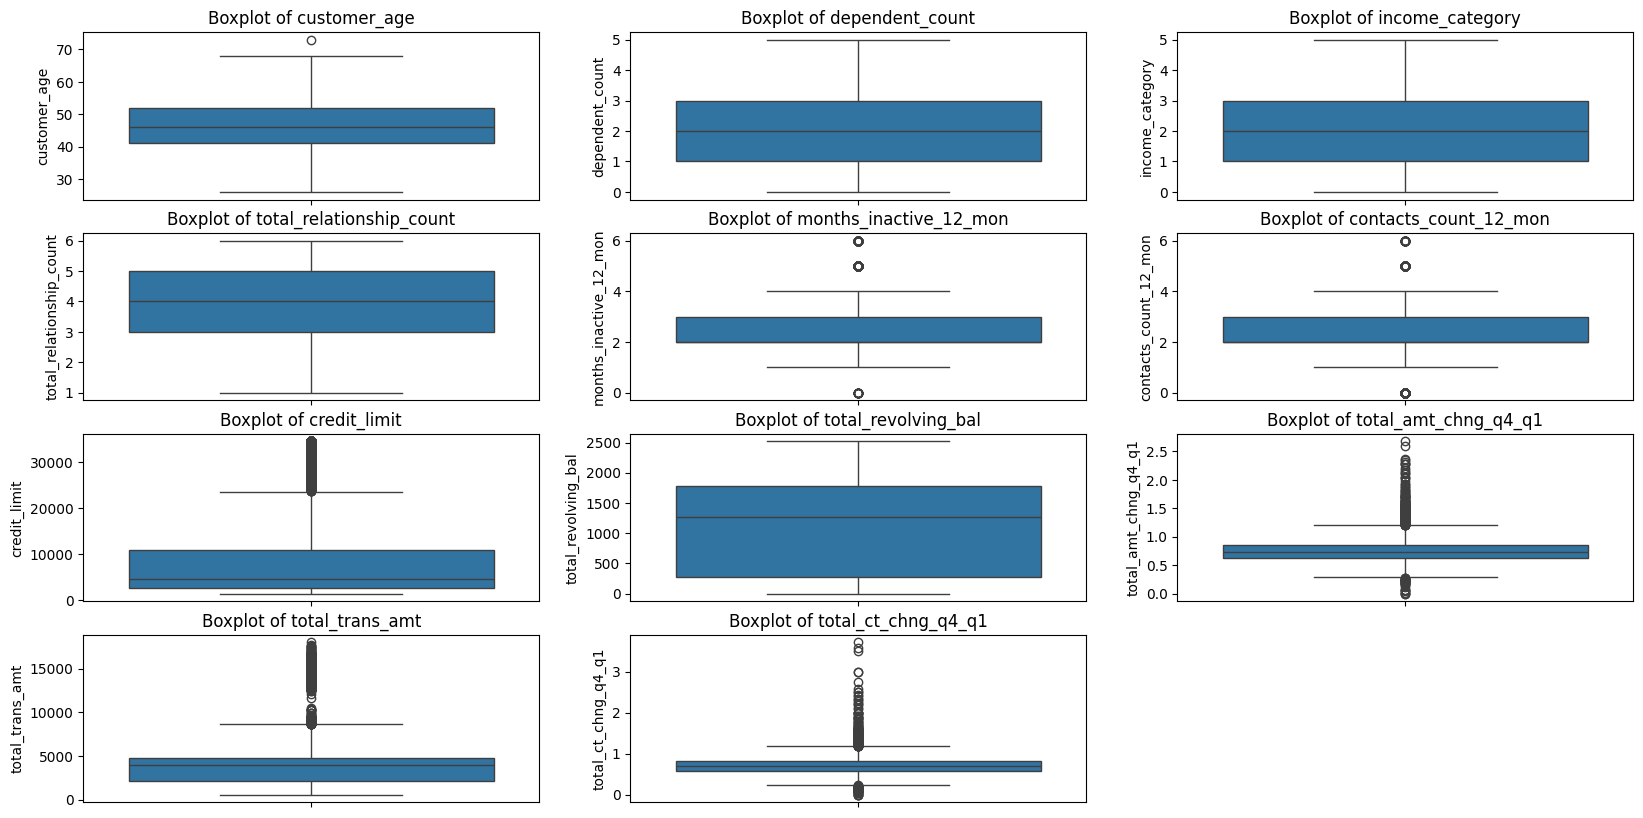

In [ ]:
features = [
    'customer_age', 'dependent_count', 'income_category',
    'total_relationship_count', 'months_inactive_12_mon', 'contacts_count_12_mon',
    'credit_limit', 'total_revolving_bal', 'total_amt_chng_q4_q1',
    'total_trans_amt', 'total_ct_chng_q4_q1'
]

# Set up the matplotlib figure
plt.figure(figsize=(20, 10))

# Create boxplots for each feature
for i, feature in enumerate(features):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(y=X_train[feature])
    plt.title(f'Boxplot of {feature}')

In [ ]:
# Handle outliers using log transformation
skewed_features = ['credit_limit']
skewed_features_2 = ['total_amt_chng_q4_q1', 'total_trans_amt', 'total_ct_chng_q4_q1']
for feature in skewed_features:
    X_train[feature] = np.log1p(X_train[feature])


# Function to handle outliers based on quantiles
def handle_outliers_quantile(df, feature, lower_percentile=0.05, upper_percentile=0.95):
    lower_bound = X_train[feature].quantile(lower_percentile)
    upper_bound = X_train[feature].quantile(upper_percentile)
    X_train[feature] = np.where(X_train[feature] < lower_bound, lower_bound, df[feature])
    X_train[feature] = np.where(X_train[feature] > upper_bound, upper_bound, df[feature])
for feature in skewed_features_2 :
    handle_outliers_quantile(X_train, feature)

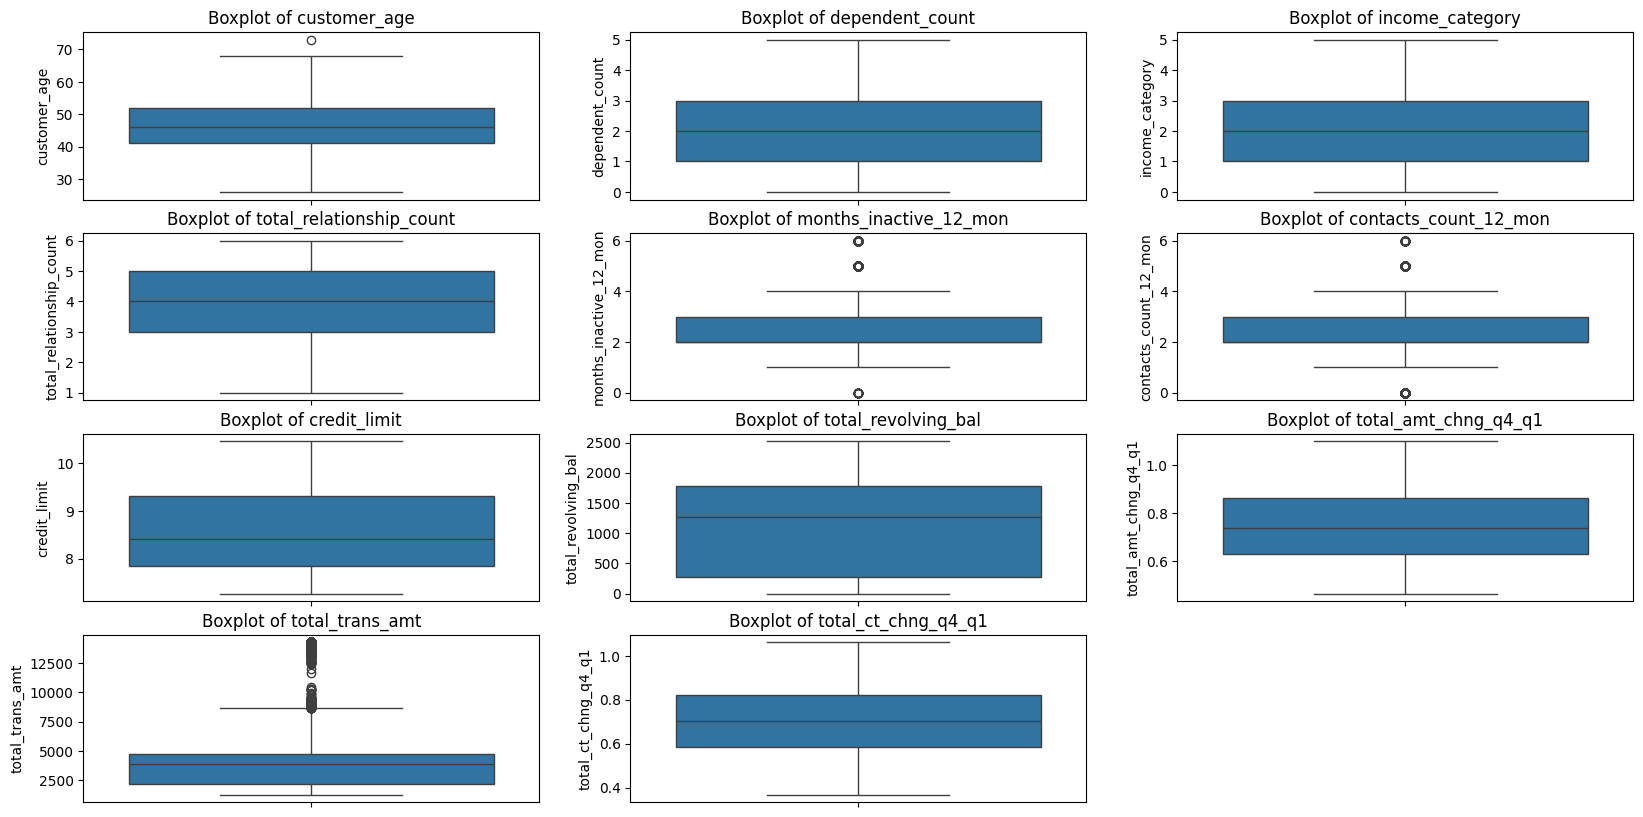

In [ ]:
# Set up the matplotlib figure
plt.figure(figsize=(20, 10))

# Create boxplots for each feature
for i, feature in enumerate(features):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(y=X_train[feature])
    plt.title(f'Boxplot of {feature}')

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Scale the training data
X_train_scaled = scaler.fit_transform(X_train)

# Scale the test data
X_test_scaled = scaler.transform(X_test)

In [ ]:
y_train.value_counts()

attrition_flag
1    5939
0    1135
Name: count, dtype: int64

0: attrited customer (churn) , 1: existing_customer (not churn)

When dealing with imbalanced datasets, metrics like precision, recall, F1 score, and ROC AUC are more informative than accuracy.

The context of this modeling is to determine whether a customer will churn or not. Because of this, we prefer a lower number of 'FP' (False Positives). This means we want to minimize the error where the prediction shows the customer will churn, but actually, they will not. Therefore, we will focus on `Precision` as our evaluation metric.

## Interpretable Model: Logistic Regression and KNN

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Define Decision Tree Classifier model
dt = DecisionTreeClassifier(random_state=42)

In [ ]:
 # Hyperparameter tuning for Decision Tree using GridSearchCV
parameters_dt = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

dt_gridcv = GridSearchCV(dt, parameters_dt, cv=5, scoring='precision')
dt_gridcv.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='precision')

In [ ]:
# define the estimator/model
from sklearn.neighbors import KNeighborsClassifier

knn= KNeighborsClassifier()

In [ ]:
# hyperparameter tuning with weights
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_neighbors': (2,3,4,5,6,7,8),
    'weights':('uniform','distance')
}

knn_gridcv = GridSearchCV(knn, parameters, cv=5, scoring='precision')
knn_gridcv.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': (2, 3, 4, 5, 6, 7, 8),
                         'weights': ('uniform', 'distance')},
             scoring='precision')

## Not Interpretable Model: Random Forest

In [ ]:

# define random forest classifier model
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

In [ ]:
#hyperparameter tuning
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': (10,20,30,40,50),
    'max_depth':(1,2,3,4,5)
}

rf_gridcv = GridSearchCV(rf, parameters, cv=5, scoring='precision')
rf_gridcv.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': (1, 2, 3, 4, 5),
                         'n_estimators': (10, 20, 30, 40, 50)},
             scoring='precision')

## Model Evaluation

In [ ]:
y_pred_dt = dt_gridcv.best_estimator_.predict(X_test_scaled)
y_pred_knn = knn_gridcv.best_estimator_.predict(X_test_scaled)
y_pred_rf = rf_gridcv.best_estimator_.predict(X_test_scaled)

## Confusion Matrix

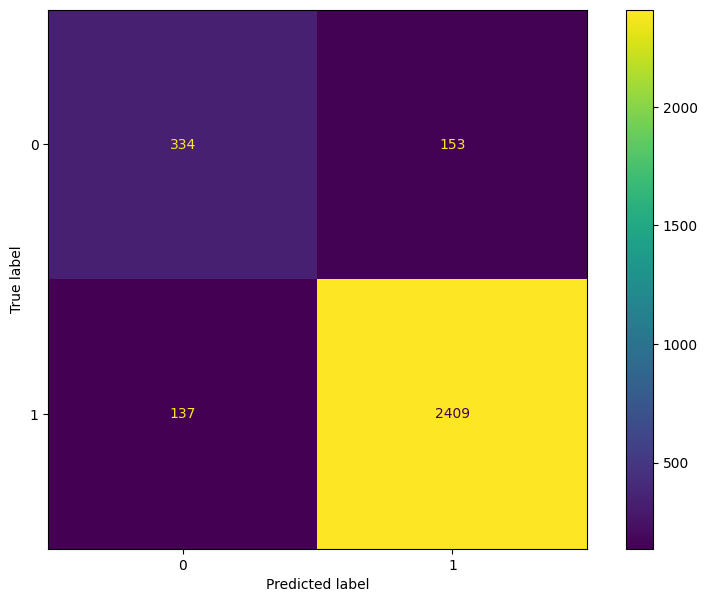

In [ ]:

# plotting confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred_dt = dt_gridcv.best_estimator_.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred_dt, labels=dt_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=dt_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

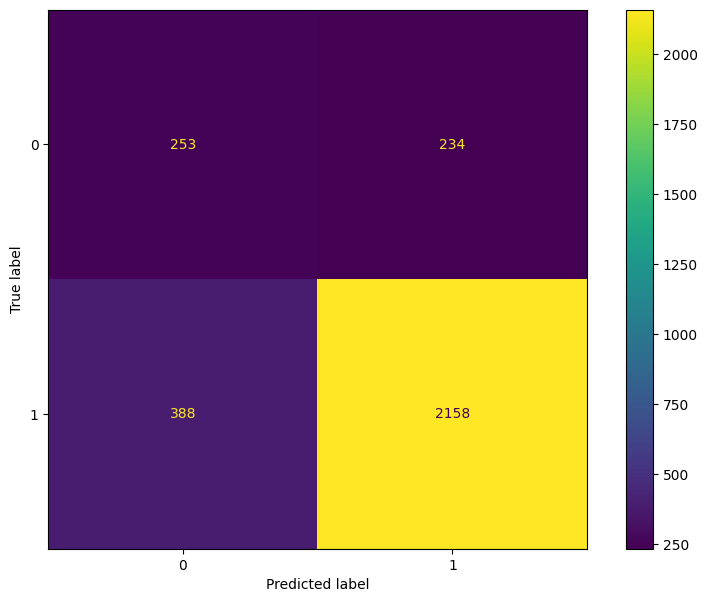

In [ ]:
# plotting confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred_knn = knn_gridcv.best_estimator_.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred_knn, labels=knn_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=knn_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

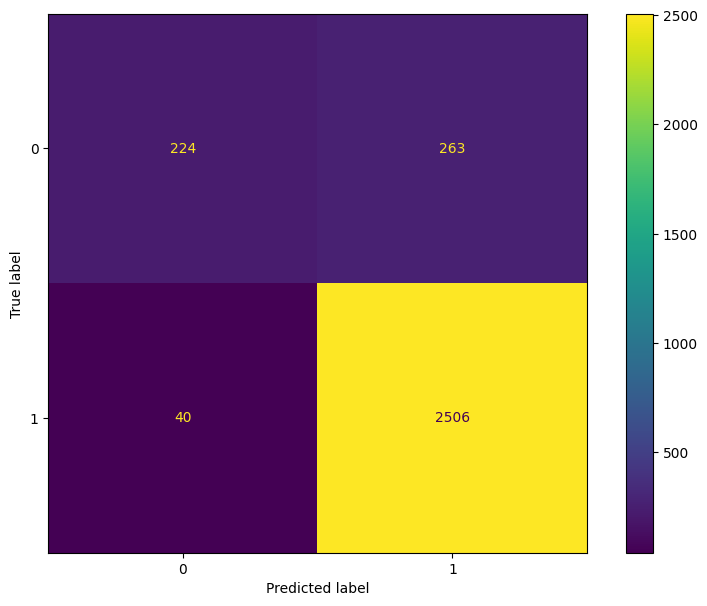

In [ ]:
# plotting confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred_rf = rf_gridcv.best_estimator_.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred_rf, labels=rf_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

## Classification Report

In [ ]:
# classification report
from sklearn.metrics import classification_report
y_pred_dt = dt_gridcv.best_estimator_.predict(X_test_scaled)
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.71      0.69      0.70       487
           1       0.94      0.95      0.94      2546

    accuracy                           0.90      3033
   macro avg       0.82      0.82      0.82      3033
weighted avg       0.90      0.90      0.90      3033



In [ ]:
# classification report
from sklearn.metrics import classification_report
y_pred_knn = knn_gridcv.best_estimator_.predict(X_test_scaled)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.39      0.52      0.45       487
           1       0.90      0.85      0.87      2546

    accuracy                           0.79      3033
   macro avg       0.65      0.68      0.66      3033
weighted avg       0.82      0.79      0.81      3033



In [ ]:
# classification report
from sklearn.metrics import classification_report
y_pred_rf = rf_gridcv.best_estimator_.predict(X_test_scaled)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.85      0.46      0.60       487
           1       0.91      0.98      0.94      2546

    accuracy                           0.90      3033
   macro avg       0.88      0.72      0.77      3033
weighted avg       0.90      0.90      0.89      3033



## Comparison by Clasification Report

In [ ]:
data = {
    'Model': ['Decision Tree','KNN', 'Random Forest'],
    'Churn Type': [0, 0, 0],
    'Precision': [0.71, 0.39, 0.85],
    'Recall': [0.69, 0.52, 0.46],
    'F1-score': [0.70, 0.45, 0.60]
}


class_report = pd.DataFrame(data)

print(class_report)

           Model  Churn Type  Precision  Recall  F1-score
0  Decision Tree           0       0.71    0.69      0.70
1            KNN           0       0.39    0.52      0.45
2  Random Forest           0       0.85    0.46      0.60



Best Model - Random Forest:

Highest Precision (0.85): The Random Forest model has the highest precision for predicting churn. This means that 85% of the customers it predicts as likely to churn do indeed churn. This high precision reduces the risk of false positives (i.e., incorrectly predicting that a customer will churn).

Trade-off with Recall (0.46): While the recall is lower, meaning it misses some customers who do churn, our primary focus is precision. This trade-off is acceptable given our objective to minimize false alarms.

Conclusion:

Using the Random Forest model, we can more accurately identify customers at risk of churning. This allows us to target retention efforts more effectively and reduce unnecessary interventions for customers who are not at risk.


## ROC Curves

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


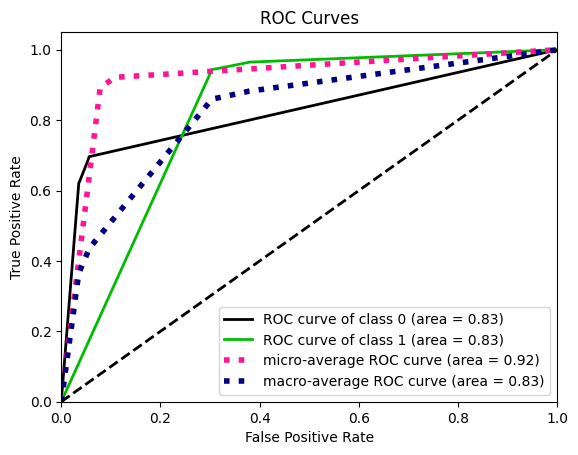

In [ ]:
dt_pred_proba = dt_gridcv.best_estimator_.predict_proba(X_test_scaled)
# decision tree result
skplt.metrics.plot_roc_curve(y_test, dt_pred_proba);

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


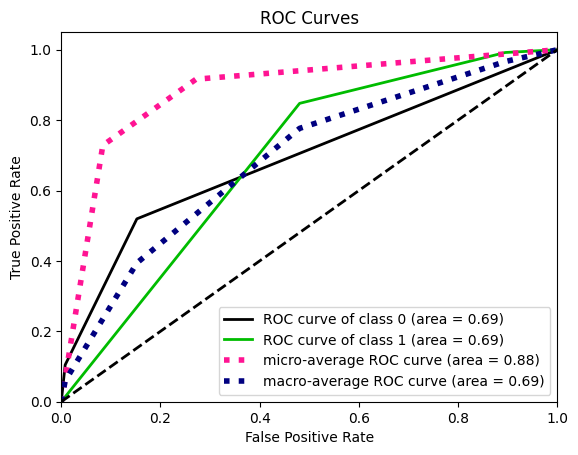

In [ ]:
rf_pred_proba = knn_gridcv.best_estimator_.predict_proba(X_test_scaled)
# KNN result
skplt.metrics.plot_roc_curve(y_test, rf_pred_proba);

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


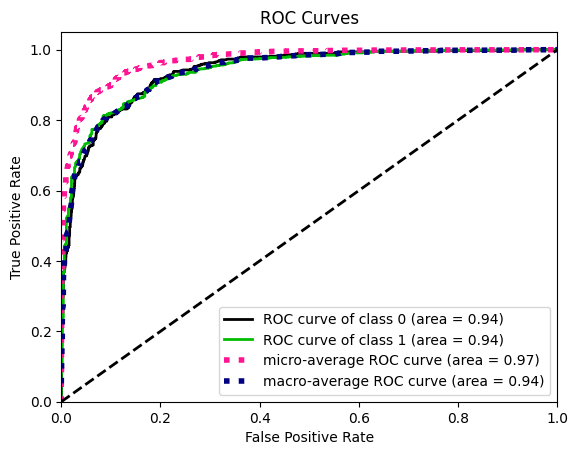

In [ ]:
rf_pred_proba = rf_gridcv.best_estimator_.predict_proba(X_test_scaled)
# random forest result
skplt.metrics.plot_roc_curve(y_test, rf_pred_proba);


Based on all the model ROC Curves, we can identify that all the ROC curve lines (represented in blue) are above the random classifier line (black dotted line). This means that all the models are better at predicting class 0 (churn class customer) compared to predicting it without a model (only by reading data trends, relationships with certain features, etc.).



## Model Agnostic Methods

In [ ]:
churn_rf_exp = dx.Explainer(rf_gridcv.best_estimator_, X_train, y_train, label = "RF Interpretation")


Preparation of a new explainer is initiated

  -> data              : 7074 rows 17 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 7074 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : RF Interpretation
  -> predict function  : <function yhat_proba_default at 0x7ca592577370> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.416, mean = 0.706, max = 0.973
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.973, mean = 0.134, max = 0.584
  -> model_info        : package sklearn

A new explainer has been created!


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


The best model is Random Forest. Because Random Forest is not an inherently interpretable model, we will focus on analyzing feature importance using Model Agnostic Methods.

## Permutation Feature Importance + Partial Dependence Plot

In [ ]:
churn_rf_exp.model_parts().plot()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without


Based on the feature importance analysis with the Random Forest model, we can conclude that the most important feature is contacts_count_12_mon, which represents the number of interactions between the bank and the customer in the last 12 months.

In [ ]:
churn_rf_exp.model_profile().plot()

Calculating ceteris paribus:   0%|          | 0/17 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

Calculating ceteris paribus:  12%|█▏        | 2/17 [00:00<00:01, 14.13it/s]/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

Calculating ceteris paribus:  24%|██▎       | 4/17 [00:00<00:00, 15.02it/s]/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

Based on the dependence plot observation, we can see the impact of the contacts_count_12_months feature. It indicates that customers who interact 2-3 times within the last 12 months are more likely to churn. Additionally, customers who have more than 3 interactions are even more likely to churn.


We can agree that the customer will most likely to change from existing to attrited after 2 to 3 interaction with bank for last 12 months.

Because of that we can recommended several things:
1. we should observe the product and features in online platform that most customer use in 2-3 interaction.
Evaluate the UX and optimize features to make the platform more user-friendly, especially for older or less tech-savvy customers.

2. Utilize the interactions to provide proactive customer support and assistance. Identify pain points or issues that customers may face and address them promptly to enhance customer satisfaction.

3. Use insights from customer interactions to offer personalized incentives or rewards.This could include targeted discounts on services, exclusive offers for loyal customers, or benefits that align with their tier of financial neeeds.